In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import glob

In [5]:
glob.glob(r'C:\Users\utkun\OneDrive\Desktop\Data Analysis Udemy\individual_stocks_5yr\*csv')

['C:\\Users\\utkun\\OneDrive\\Desktop\\Data Analysis Udemy\\individual_stocks_5yr\\AAL_data.csv',
 'C:\\Users\\utkun\\OneDrive\\Desktop\\Data Analysis Udemy\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\utkun\\OneDrive\\Desktop\\Data Analysis Udemy\\individual_stocks_5yr\\AAP_data.csv',
 'C:\\Users\\utkun\\OneDrive\\Desktop\\Data Analysis Udemy\\individual_stocks_5yr\\ABBV_data.csv',
 'C:\\Users\\utkun\\OneDrive\\Desktop\\Data Analysis Udemy\\individual_stocks_5yr\\ABC_data.csv',
 'C:\\Users\\utkun\\OneDrive\\Desktop\\Data Analysis Udemy\\individual_stocks_5yr\\ABT_data.csv',
 'C:\\Users\\utkun\\OneDrive\\Desktop\\Data Analysis Udemy\\individual_stocks_5yr\\ACN_data.csv',
 'C:\\Users\\utkun\\OneDrive\\Desktop\\Data Analysis Udemy\\individual_stocks_5yr\\ADBE_data.csv',
 'C:\\Users\\utkun\\OneDrive\\Desktop\\Data Analysis Udemy\\individual_stocks_5yr\\ADI_data.csv',
 'C:\\Users\\utkun\\OneDrive\\Desktop\\Data Analysis Udemy\\individual_stocks_5yr\\ADM_data.csv',
 'C:\\Users\\utku

In [7]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [13]:
company_list = [
    r'C:\\Users\\utkun\\OneDrive\\Desktop\\Data Analysis Udemy\\individual_stocks_5yr\\AAPL_data.csv' , 
    r'C:\\Users\\utkun\\OneDrive\\Desktop\\Data Analysis Udemy\\individual_stocks_5yr\\AMD_data.csv' , 
    r'C:\\Users\\utkun\\OneDrive\\Desktop\\Data Analysis Udemy\\individual_stocks_5yr\\CSCO_data.csv' , 
    r'C:\\Users\\utkun\\OneDrive\\Desktop\\Data Analysis Udemy\\individual_stocks_5yr\\LNT_data.csv'   
]

In [16]:
all_data = pd.DataFrame()
for file in company_list:
    current_df = pd.read_csv(file)
    all_data = pd.concat([all_data, current_df] , ignore_index = True)

In [18]:
all_data['Name'].unique()

array(['AAPL', 'AMD', 'CSCO', 'LNT'], dtype=object)

In [19]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [46]:
all_data.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [20]:
tech_comp = all_data['Name'].unique()

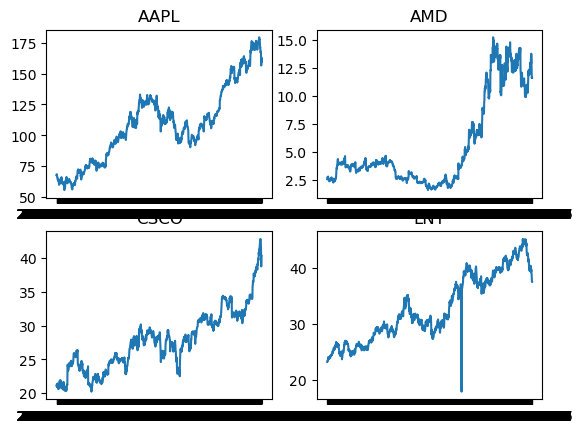

In [21]:
# we have enumerated this list so that it can generate the index from 1
for ind,cmp in enumerate(tech_comp,1):
    plt.subplot(2,2,ind)
    filter1 = all_data['Name'] == cmp
    df = all_data[filter1]
    plt.plot(df['date'],df['close'])
    plt.title(cmp)

In [23]:
new_data = all_data.copy()
ma_day = [10,20,30]
for ma in ma_day:
    new_data['close_'+str(ma)] = new_data['close'].rolling(ma).mean()

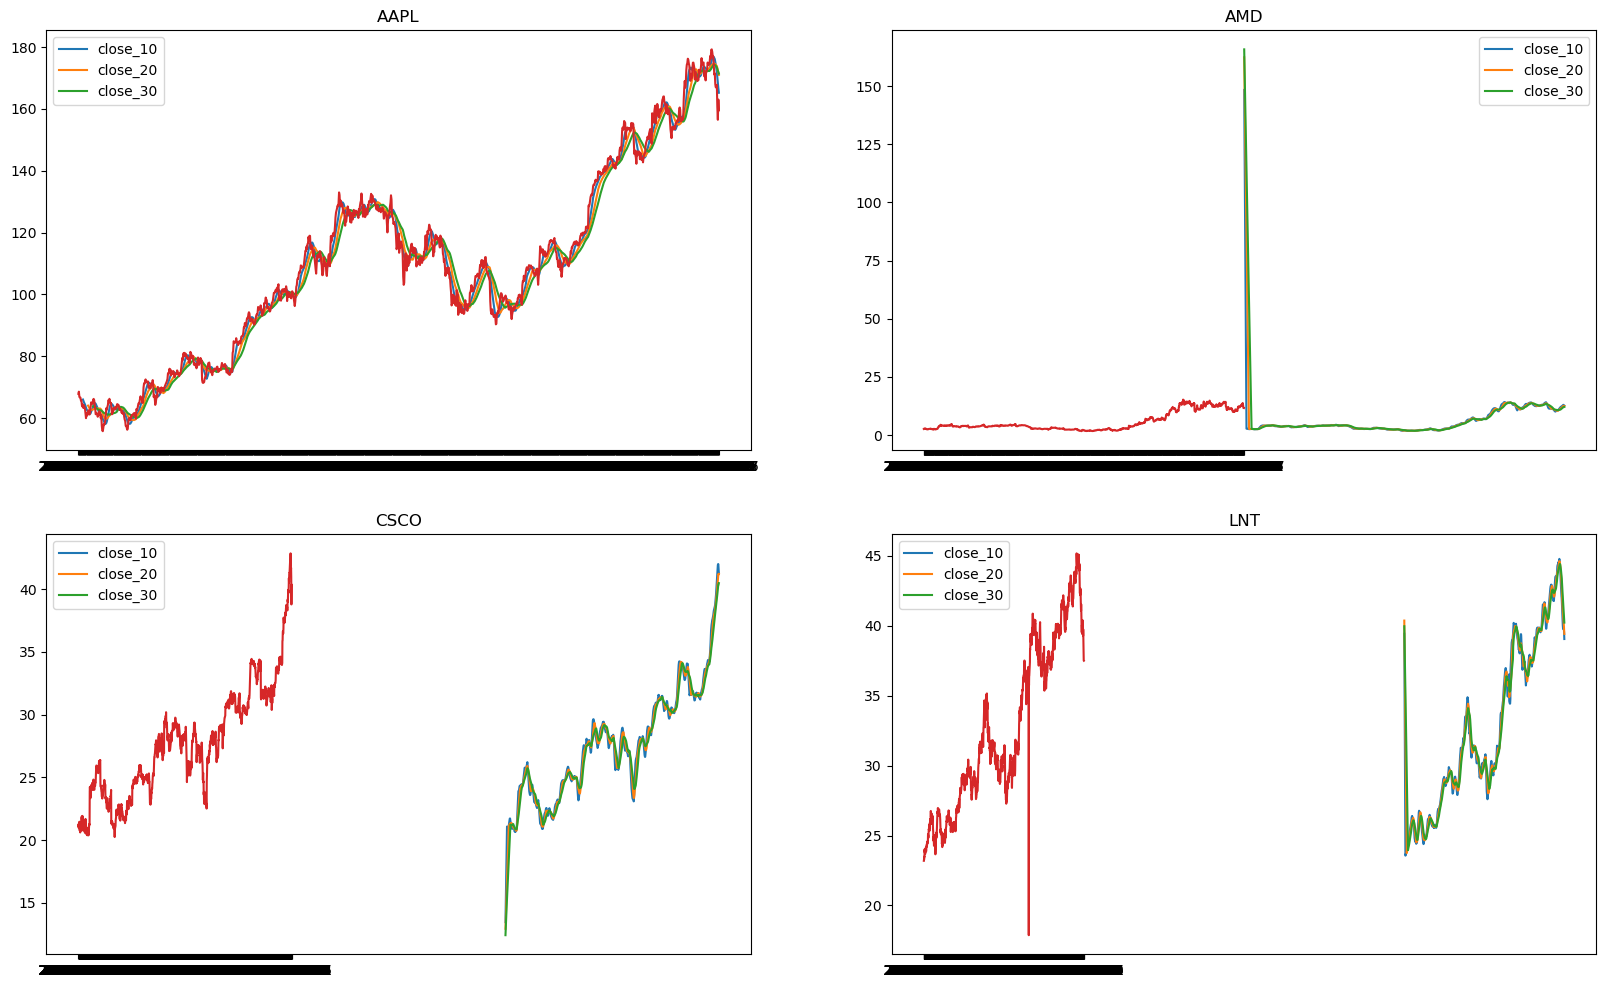

In [26]:
plt.figure(figsize=(20,12))
for ind,cmp in enumerate(tech_comp,1):
    plt.subplot(2,2,ind)
    filter1 = new_data['Name'] == cmp
    df = new_data[filter1]
    df[['close_10','close_20','close_30']].plot(ax=plt.gca())
    plt.plot(df['date'],df['close'])
    plt.title(cmp)

In [27]:
lnt = pd.read_csv('C:\\Users\\utkun\\OneDrive\\Desktop\\Data Analysis Udemy\\individual_stocks_5yr\\LNT_data.csv')

In [28]:
lnt.head(5)

date    open    high      low   close   volume Name
0  2013-02-08  23.140  23.210  23.0502  23.190   495972  LNT
1  2013-02-11  23.205  23.300  23.1250  23.255   530144  LNT
2  2013-02-12  23.220  23.415  23.2200  23.320   643436  LNT
3  2013-02-13  23.340  23.420  23.2250  23.305   874582  LNT
4  2013-02-14  23.265  23.560  23.1300  23.500  1191670  LNT

In [29]:
lnt['daily_return'] = lnt['close'].pct_change()*100

In [30]:
lnt.head(5)

date    open    high      low   close   volume Name  daily_return
0  2013-02-08  23.140  23.210  23.0502  23.190   495972  LNT           NaN
1  2013-02-11  23.205  23.300  23.1250  23.255   530144  LNT      0.280293
2  2013-02-12  23.220  23.415  23.2200  23.320   643436  LNT      0.279510
3  2013-02-13  23.340  23.420  23.2250  23.305   874582  LNT     -0.064322
4  2013-02-14  23.265  23.560  23.1300  23.500  1191670  LNT      0.836730

In [31]:
import plotly.express as px

In [33]:
px.line(lnt,x='date',y='daily_return')

In [34]:
company_list

['C:\\\\Users\\\\utkun\\\\OneDrive\\\\Desktop\\\\Data Analysis Udemy\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'C:\\\\Users\\\\utkun\\\\OneDrive\\\\Desktop\\\\Data Analysis Udemy\\\\individual_stocks_5yr\\\\AMD_data.csv',
 'C:\\\\Users\\\\utkun\\\\OneDrive\\\\Desktop\\\\Data Analysis Udemy\\\\individual_stocks_5yr\\\\CSCO_data.csv',
 'C:\\\\Users\\\\utkun\\\\OneDrive\\\\Desktop\\\\Data Analysis Udemy\\\\individual_stocks_5yr\\\\LNT_data.csv']

In [35]:
aap = pd.read_csv(company_list[0])
amd = pd.read_csv(company_list[1])
csco = pd.read_csv(company_list[2])
lnt = pd.read_csv(company_list[3])

In [37]:
closing_price = pd.DataFrame()

In [41]:
closing_price['apple_close'] = aap['close']
closing_price['amd_close'] = amd['close']
closing_price['cisco_close'] = csco['close']
closing_price['lnt_close'] = lnt['close']

In [43]:
closing_price

apple_close  amd_close  cisco_close  lnt_close
0         67.8542       2.59        21.16     23.190
1         68.5614       2.67        21.27     23.255
2         66.8428       2.77        20.97     23.320
3         66.7156       2.75        21.14     23.305
4         66.6556       2.75        20.99     23.500
...           ...        ...          ...        ...
1254     167.7800      13.25        41.70     39.080
1255     160.5000      12.45        40.93     38.910
1256     156.4900      11.57        38.78     38.220
1257     163.0300      11.65        40.17     37.510
1258     159.5400      11.60        40.34     37.500

[1259 rows x 4 columns]

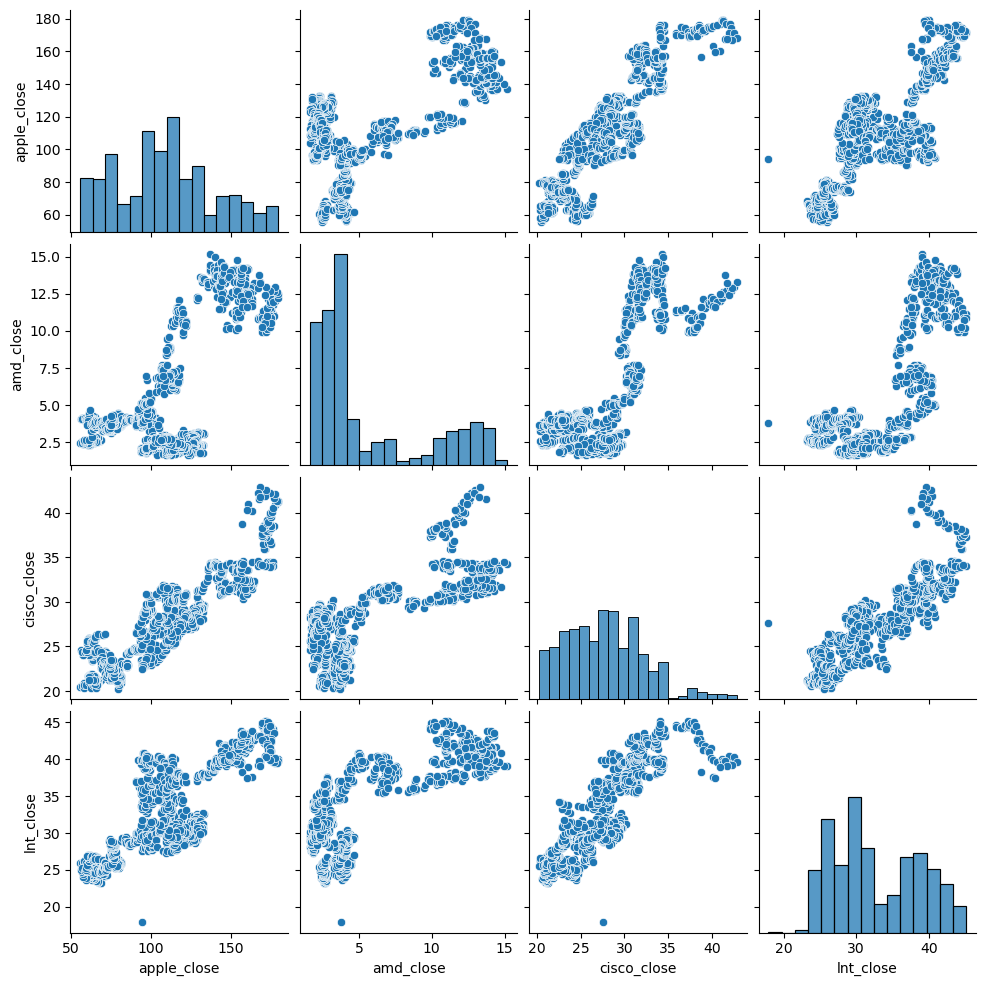

In [42]:
sns.pairplot(closing_price)

### we get an almost a straight line increasing graph between apple and cisco thus they have higher corelation, implies that if closing price of apple will increase the closing price of cisco will also increase

In [45]:
closing_price.corr()

apple_close  amd_close  cisco_close  lnt_close
apple_close     1.000000   0.676133     0.888336   0.821234
amd_close       0.676133   1.000000     0.744113   0.773529
cisco_close     0.888336   0.744113     1.000000   0.865872
lnt_close       0.821234   0.773529     0.865872   1.000000

### THE END